In [ ]:
#Task 1 - Fitbit Dataset

1. Read this dataset in pandas , mysql and mongodb 
2. while creting a table in mysql dont use manual approach to create it  ,always use a automation to create a table in mysql
 ## hint - use csvkit library to automate this task and to load a data in bulk in you mysql 
3. convert all the dates avaible in dataset to timestamp format in pandas and in sql you to convert it in date format
4 . Find out in this data that how many unique id's we have 
5 . which id is one of the active id that you have in whole dataset 
6 . how many of them have not logged there activity find out in terms of number of ids 
7 . Find out who is the laziest person id that we have in dataset 
8 . Explore over an internet that how much calories burn is required for a healthy person and find out how many healthy person we have in our dataset 
9. how many person are not a regular person with respect to activity try to find out those 
10 . who is the thired most active person in this dataset find out those in pandas and in sql both . 
11 . who is the 5th most laziest person avilable in dataset find it out 
12 . what is a totla acumulative calories burn for a person find out 


In [ ]:
#task 2 - Superstore_USA
1 . load this data in sql and in pandas with a relation in sql 
2 . while loading this data you dont have to create a table manually you can use any automated approach to create a table and load a data in bulk in table 
3 . Find out how return that we have recived and with a product id 
4 . try  to join order and return data both in sql and pandas 
5 . Try to find out how many unique customer that we have 
6 . try to find out in how many regions we are selling a product and who is a manager for a respective region 
7 . find out how many different differnet shipement mode that we have and what is a percentage usablity of all the shipment mode with respect to dataset 
8 . Create a new coulmn and try to find our a diffrence between order date and shipment date
9 . base on question number 8 find out for which order id we have shipment duration more than 10 days 
10 . Try to find out a list of a returned order which sihpment duration was more then 15 days and find out that region manager as well 
11 . Gorup by region and find out which region is more profitable 
12 . Try to find out overalll in which country we are giving more didscount 
13 . Give me a list of unique postal code 
14 . which customer segement is more profitalble find it out . 
15 . try to find out the 10th most loss making product catagory . 
16 . Try to find out 10 top  product with highest margins 


In [1]:
# Task1 => Ans1:

import pandas as pd
import pymongo
import json

fitBit_DF = pd.read_csv("FitBit_data.csv")
fitBit_DF.head()

fitBit_DF.to_json("fitBitData.json")

client = pymongo.MongoClient("mongodb+srv://<username:password>@cluster0.2esukot.mongodb.net/?retryWrites=true&w=majority")
db = client.test

database = client["challenges_31st_July"]
collection = database["FitBitData"]

with open ("fitBitData.json") as json_file:
    fitBit_dict = json.load(json_file)
collection.insert_one(fitBit_dict)






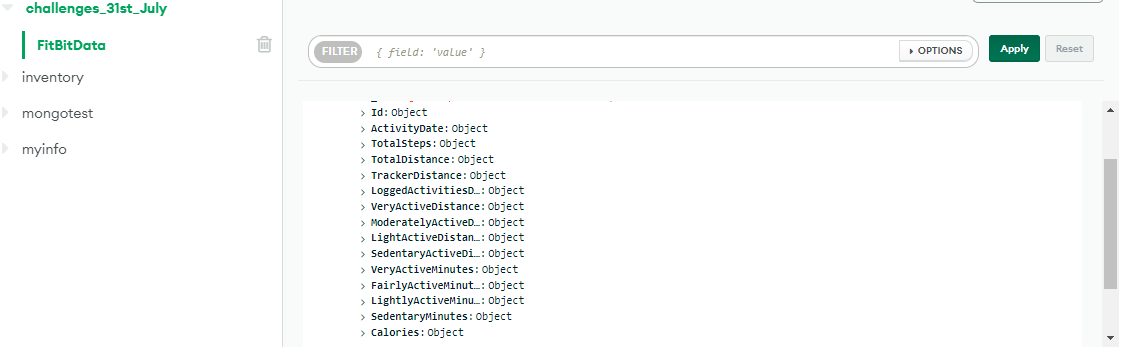

In [5]:
# Task1 => Ans2:

!csvsql --db mysql://root:<password>@localhost/challenge --insert --tables FitBitData  FitBit_data.csv


c:\users\admin\anaconda3\lib\site-packages\win32\lib\pywintypes.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
c:\users\admin\anaconda3\lib\site-packages\agate\table\from_csv.py:74: RuntimeWarning: Error sniffing CSV dialect: Could not determine delimiter


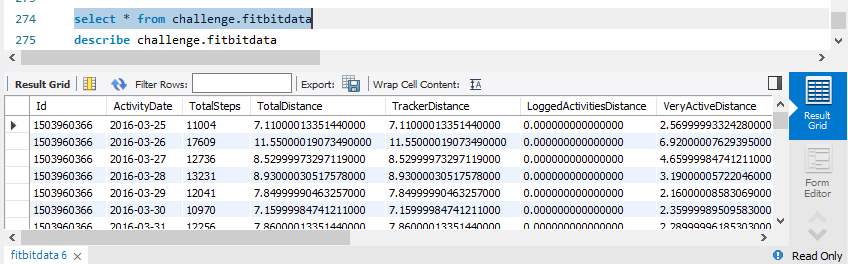

In [6]:
# Task1 => Ans3:

fitBit_DF["ActivityDate_dt"] = pd.to_datetime(fitBit_DF["ActivityDate"])
fitBit_DF["ActivityDate_dt"] = fitBit_DF["ActivityDate_dt"].dt.strftime('%d-%m-%Y %H:%M')
fitBit_DF.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityDate_dt
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,25-03-2016 00:00
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,26-03-2016 00:00
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,27-03-2016 00:00
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,28-03-2016 00:00
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,29-03-2016 00:00


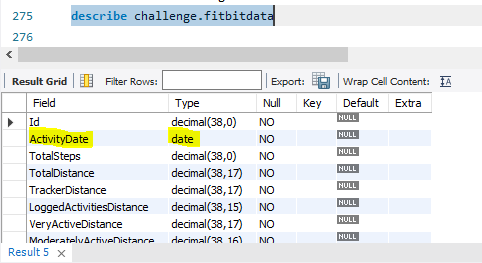

In [7]:
# Task1 => Ans4:

unique_id_arr = fitBit_DF.Id.unique()
len(unique_id_arr)

35

In [8]:
# Task1 => Ans5:

fitBit_DF_grpby = fitBit_DF.groupby(["Id"])["TotalSteps"].sum().reset_index()
most_active_id = fitBit_DF_grpby[fitBit_DF_grpby["TotalSteps"] == max(fitBit_DF_grpby["TotalSteps"])]
most_active_id

# max(fitBit_DF_grpby)

# most_active_id = fitBit_DF[fitBit_DF["TotalSteps"] == max(fitBit_DF["TotalSteps"])]
# max(fitBit_DF["TotalSteps"])

,Id,TotalSteps
0,1503960366,221170


In [9]:
# Task1 => Ans6:

fitBit_DF_no_log = fitBit_DF[fitBit_DF["LoggedActivitiesDistance"] == 0]
len(fitBit_DF_no_log.Id.unique())

35

In [10]:
# Task1 => Ans7:

most_inactive_id = fitBit_DF_grpby[fitBit_DF_grpby["TotalSteps"] == min(fitBit_DF_grpby["TotalSteps"])]
most_inactive_id

,Id,TotalSteps
16,4388161847,0


In [11]:
# Task1 => Ans8:

healthy_id_DF = fitBit_DF[fitBit_DF["Calories"]>2000]
len(healthy_id_DF.Id.unique())

30

In [12]:
# Task1 => Ans9:

nonRegularId_DF = fitBit_DF.groupby('Id')['ActivityDate_dt'].count().reset_index(name='count')
nonRegularId_DF[nonRegularId_DF['count'] < 16]
# fitBit_DF.pivot(index ='Id', columns ='ActivityDate_dt', values =['TotalSteps'])
# cnt = fitBit_DF.pivot_table(values =['TotalSteps'], index ='Id', columns ='ActivityDate_dt', aggfunc= pd.Series.nunique).reset_index()
# cnt['total_count'] = cnt.TotalSteps.sum(skipna = True)
# cnt

,Id,count
2,1644430081,10
3,1844505072,12
4,1927972279,12
5,2022484408,12
6,2026352035,12
7,2320127002,12
8,2347167796,15
9,2873212765,12
10,2891001357,8
11,3372868164,10


In [13]:
# Task1 => Ans10:

thirdMostActiveDF = fitBit_DF_grpby.sort_values('TotalSteps', ascending=False)
thirdMostActiveDF.reset_index(drop=True, inplace=True)
thirdMostActiveDF.iloc[2]

Id            4020332650
TotalSteps        184851
Name: 2, dtype: int64

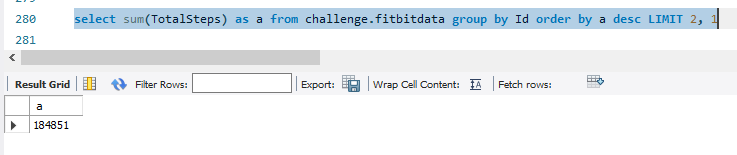

In [14]:
# Task1 => Ans11:

fifthMostLazyDF = thirdMostActiveDF.sort_values('TotalSteps')
fifthMostLazyDF.reset_index(drop=True, inplace=True)
fifthMostLazyDF.iloc[4]

Id            8583815059
TotalSteps         24364
Name: 4, dtype: int64

In [15]:
# Task1 => Ans12:

fitBitTotCalories_DF = fitBit_DF.groupby('Id')['Calories'].sum().reset_index()
fitBitTotCalories_DF

,Id,Calories
0,1503960366,34128
1,1624580081,25705
2,1644430081,29164
3,1844505072,19391
4,1927972279,27048
5,2022484408,29704
6,2026352035,16266
7,2320127002,18385
8,2347167796,30320
9,2873212765,20349


In [16]:
# Task2 => Ans1:

import pandas as pd
superstore_USA_orders_DF = pd.read_excel("Superstore_USA.xlsx", sheet_name='Orders')
superstore_USA_returns_DF = pd.read_excel("Superstore_USA.xlsx", sheet_name='Returns')
superstore_USA_users_DF = pd.read_excel("Superstore_USA.xlsx", sheet_name='Users')


In [17]:
superstore_USA_orders_DF.to_csv("Superstore_USA_Orders.csv", index = False)

In [18]:
# Task2 => Ans2:

!csvsql --db mysql://root:<password>@localhost/challenge --insert --tables Superstore_USA_Orders  Superstore_USA_Orders.csv

!csvsql --db mysql://root:<password>@localhost/challenge --insert --tables Superstore_USA_Return Superstore_USA_Return.csv
        
!csvsql --db mysql://root:<password>@localhost/challenge --insert --tables Superstore_USA_users Superstore_USA_users.csv        

c:\users\admin\anaconda3\lib\site-packages\win32\lib\pywintypes.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
c:\users\admin\anaconda3\lib\site-packages\agate\table\from_csv.py:74: RuntimeWarning: Error sniffing CSV dialect: Could not determine delimiter
c:\users\admin\anaconda3\lib\site-packages\win32\lib\pywintypes.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
c:\users\admin\anaconda3\lib\site-packages\win32\lib\pywintypes.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses


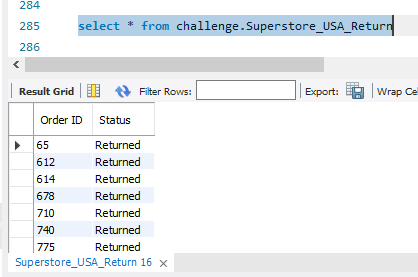

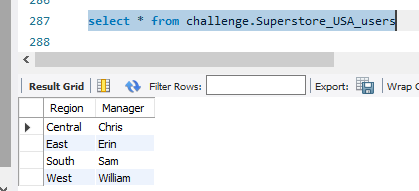

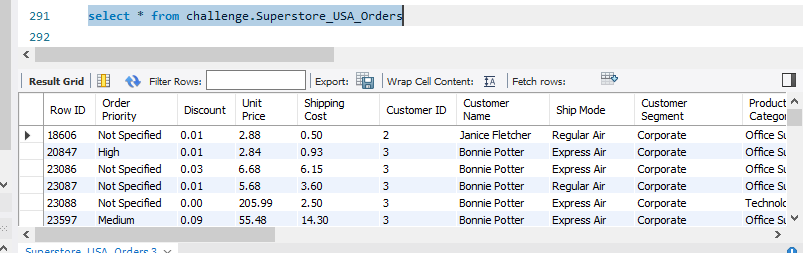

In [19]:
# Task2 => Ans3:

productReturnedDF = pd.merge(superstore_USA_orders_DF, superstore_USA_returns_DF, on = ['Order ID'])
productReturnedCNTDF = productReturnedDF.groupby(['Product Name'])['Status'].count().reset_index(name = 'returned_count')
productReturnedCNTDF

,Product Name,returned_count
0,"#10 White Business Envelopes,4 1/8 x 9 1/2",1
1,12 Colored Short Pencils,1
2,232,1
3,600 Series Flip,1
4,6160,1
...,...,...
89,Xerox 197,2
90,Xerox 1980,1
91,Xerox 1983,2
92,Xerox 210,1


In [20]:
# Task2 => Ans4:

orderAndReturnDF = pd.merge(superstore_USA_orders_DF, superstore_USA_returns_DF, how = 'left', on = ['Order ID'])
orderAndReturnDF

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Status
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Illinois,Addison,60101,2012-05-28,2012-05-30,1.320000,2,5.90,88525,NaN
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.560000,4,13.01,88522,NaN
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.640000,7,49.92,88523,NaN
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.510000,7,41.64,88523,NaN
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.202300,8,1446.67,88523,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9421,20275,Critical,0.06,35.89,14.72,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,...,West Virginia,Charleston,25314,2013-05-14,2013-05-15,137.860000,13,447.87,87532,NaN
9422,20276,Critical,0.00,3.34,7.49,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,...,West Virginia,Charleston,25314,2013-05-14,2013-05-14,-39.070000,3,13.23,87532,NaN
9423,24491,Not Specified,0.08,550.98,45.70,3402,Frederick Cole,Delivery Truck,Consumer,Furniture,...,West Virginia,Charleston,25314,2013-09-12,2013-09-14,-1225.029097,4,2215.93,87533,NaN
9424,25914,High,0.10,105.98,13.99,3403,Tammy Buckley,Express Air,Consumer,Furniture,...,Wyoming,Cheyenne,82001,2010-02-08,2010-02-11,349.485000,5,506.50,87530,NaN


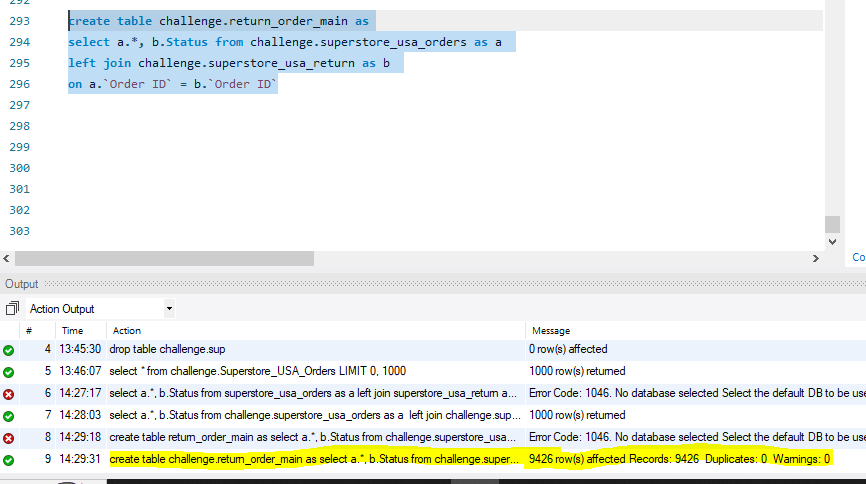

In [21]:
# Task2 => Ans5:

len(superstore_USA_orders_DF["Customer Name"].unique())

2703

In [22]:
# Task2 => Ans6:

# len(superstore_USA_orders_DF["Region"].unique())
superstore_USA_Sales_DF = superstore_USA_orders_DF.groupby('Region')['Sales'].sum().reset_index(name = 'Toatl_Sales')
superstore_USA_Sales_Manager_DF = pd.merge(superstore_USA_Sales_DF, superstore_USA_users_DF, on='Region')
superstore_USA_Sales_Manager_DF

,Region,Toatl_Sales,Manager
0,Central,2540341.62,Chris
1,East,2422804.68,Erin
2,South,1597346.22,Sam
3,West,2391438.80,William


In [23]:
# Task2 => Ans7:

superstore_ShipModePercent_DF = superstore_USA_orders_DF.groupby('Ship Mode')['Row ID'].count().reset_index(name = 'ship_mode_count')
superstore_ShipModePercent_DF['Percent'] = (superstore_ShipModePercent_DF['ship_mode_count']/
                                            superstore_ShipModePercent_DF['ship_mode_count'].sum()) * 100
superstore_ShipModePercent_DF

,Ship Mode,ship_mode_count,Percent
0,Delivery Truck,1283,13.611288
1,Express Air,1107,11.744112
2,Regular Air,7036,74.644600


In [24]:
# Task2 => Ans8:

superstore_USA_orders_DF['ship_duration'] = superstore_USA_orders_DF['Ship Date'] - superstore_USA_orders_DF['Order Date']
superstore_USA_orders_DF

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,ship_duration
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Illinois,Addison,60101,2012-05-28,2012-05-30,1.320000,2,5.90,88525,2 days
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.560000,4,13.01,88522,1 days
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.640000,7,49.92,88523,1 days
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.510000,7,41.64,88523,1 days
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.202300,8,1446.67,88523,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9421,20275,Critical,0.06,35.89,14.72,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,...,West Virginia,Charleston,25314,2013-05-14,2013-05-15,137.860000,13,447.87,87532,1 days
9422,20276,Critical,0.00,3.34,7.49,3402,Frederick Cole,Regular Air,Consumer,Office Supplies,...,West Virginia,Charleston,25314,2013-05-14,2013-05-14,-39.070000,3,13.23,87532,0 days
9423,24491,Not Specified,0.08,550.98,45.70,3402,Frederick Cole,Delivery Truck,Consumer,Furniture,...,West Virginia,Charleston,25314,2013-09-12,2013-09-14,-1225.029097,4,2215.93,87533,2 days
9424,25914,High,0.10,105.98,13.99,3403,Tammy Buckley,Express Air,Consumer,Furniture,...,Wyoming,Cheyenne,82001,2010-02-08,2010-02-11,349.485000,5,506.50,87530,3 days


In [25]:
# Task2 => Ans9:

superstore_ship_duration = superstore_USA_orders_DF[superstore_USA_orders_DF['ship_duration'] > '10 days']
superstore_ship_duration[['Order ID', 'ship_duration']]

,Order ID,ship_duration
643,87215,84 days
1548,86318,11 days
1549,86318,15 days
1678,87957,17 days
1679,87957,11 days
1680,87957,28 days
1697,19556,17 days
1698,19556,11 days
1699,19556,28 days
2515,86177,92 days


In [26]:
# Task2 => Ans10:

returnOrderHighShipDF = pd.merge(superstore_ship_duration, superstore_USA_returns_DF, how='left', on = ['Order ID'])
returnOrderHighShipDF[(returnOrderHighShipDF['ship_duration'] > '15 days') & (returnOrderHighShipDF['Status'] == 'Returned')] 

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,ship_duration,Status


In [27]:
# Task2 => Ans11:

profitableRegionDF = superstore_USA_orders_DF.groupby('Region')['Profit'].sum().reset_index()
profitableRegionDF

,Region,Profit
0,Central,519825.567067
1,East,377566.186045
2,South,104201.192420
3,West,310849.453897


In [28]:
# Task2 => Ans12:

cityMoreDiscountDF = superstore_USA_orders_DF.groupby('City')['Discount'].sum().reset_index()
cityMoreDiscountDF.sort_values('Discount', ascending=False)

,City,Discount
704,Los Angeles,10.37
850,New York City,10.16
205,Chicago,4.83
1160,Seattle,4.47
117,Boston,3.79
...,...,...
871,North Kingstown,0.00
102,Billerica,0.00
1271,Toms River,0.00
3,Acton,0.00


In [29]:
# Task2 => Ans13:

list(superstore_USA_orders_DF['Postal Code'].unique())

[60101,
 98221,
 91776,
 95123,
 2724,
 3110,
 8101,
 8109,
 7203,
 2907,
 55372,
 11787,
 13210,
 59405,
 59601,
 59801,
 68005,
 10012,
 92653,
 92677,
 92530,
 92630,
 90712,
 93534,
 90260,
 97405,
 97526,
 97030,
 97123,
 97303,
 62002,
 98373,
 98052,
 75019,
 23834,
 62701,
 60107,
 60477,
 14150,
 12180,
 77642,
 75080,
 77471,
 78664,
 75088,
 24153,
 94043,
 92563,
 94559,
 10177,
 2917,
 5401,
 4070,
 2331,
 8830,
 8701,
 7470,
 7481,
 5201,
 97035,
 44708,
 45231,
 44105,
 95687,
 5451,
 94591,
 70056,
 22102,
 60601,
 66209,
 66215,
 66502,
 66062,
 6510,
 4401,
 4005,
 2129,
 2038,
 1852,
 1752,
 2067,
 3820,
 8618,
 7644,
 7110,
 8861,
 7095,
 2895,
 97128,
 97504,
 98103,
 84118,
 84041,
 93277,
 76903,
 78207,
 60004,
 94952,
 1510,
 1106,
 1880,
 6401,
 6360,
 2664,
 15122,
 76148,
 5439,
 5403,
 37664,
 37918,
 37086,
 37087,
 80525,
 80817,
 60452,
 76131,
 98059,
 99352,
 37804,
 70802,
 4092,
 7024,
 76240,
 98158,
 78415,
 94122,
 4011,
 4240,
 2474,
 2540,
 1580

In [30]:
# Task2 => Ans14:

custSegmentMostProfitDF = superstore_USA_orders_DF.groupby('Customer Segment')['Profit'].sum().reset_index()
custSegmentMostProfitDF.sort_values('Profit', ascending=False)

,Customer Segment,Profit
1,Corporate,505538.627783
3,Small Business,316474.592482
2,Home Office,283869.553814
0,Consumer,206559.625348


In [31]:
# Task2 => Ans15:

prodCatHighLossDF = superstore_USA_orders_DF[['Product Category', 'Profit']]
prodCatHighLossDF_sorted = prodCatHighLossDF.sort_values('Profit').reset_index(drop = True)
prodCatHighLossDF_sorted.loc[10:10]


,Product Category,Profit
10,Technology,-7373.1282


In [32]:
# Task2 => Ans16:

top10HighMarginDF = superstore_USA_orders_DF.sort_values('Product Base Margin').reset_index(drop = True)
top10HighMarginDF.loc[0:9, ['Product Name', 'Product Base Margin']]

,Product Name,Product Base Margin
0,GBC DocuBind 200 Manual Binding Machine,0.35
1,"Peel & Seel® Recycled Catalog Envelopes, Brown",0.35
2,"Peel & Seel® Recycled Catalog Envelopes, Brown",0.35
3,"Peel & Seel® Recycled Catalog Envelopes, Brown",0.35
4,Accessory31,0.35
5,Prang Dustless Chalk Sticks,0.35
6,Staples Brown Kraft Recycled Clasp Envelopes,0.35
7,Storex DuraTech Recycled Plastic Frosted Binders,0.35
8,Accessory31,0.35
9,Adams Telephone Message Book w/Frequently-Call...,0.35
